In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

font_path = "/System/Library/Fonts/Supplemental/AppleGothic.ttf"  # Mac의 경우
font_prop = fm.FontProperties(fname=font_path, size=12)

plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family=font_prop.get_name())

In [56]:
import pandas as pd

life = pd.read_csv('../data/Consumer_Life.csv')

# 2021 & 2023 컬럼만 자동 추출
life_cols = ['행정구역별(1)', '특성별(1)', '특성별(2)'] + \
            [c for c in life.columns if c.startswith('2021')] + \
            [c for c in life.columns if c.startswith('2023')]

life_21_23 = life[life_cols]

life_21_23.head()


,행정구역별(1),특성별(1),특성별(2),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2023,2023.1,2023.2,2023.3,2023.4,2023.5
0,행정구역별(1),특성별(1),특성별(2),계,매우 만족,약간 만족,보통,약간 불만족,매우 불만족,계,매우 만족,약간 만족,보통,약간 불만족,매우 불만족
1,전국,전체,계,100.0,3.3,15.4,48.5,25.1,7.8,100.0,3.3,17.9,49.9,22.1,6.8
2,전국,성별,남자,100.0,3.2,15.2,49.0,24.4,8.2,100.0,3.1,18.0,51.2,20.8,6.9
3,전국,성별,여자,100.0,3.4,15.5,47.9,25.9,7.4,100.0,3.4,17.8,48.6,23.3,6.8
4,서울특별시,전체,계,100.0,4.1,16.4,45.8,25.0,8.7,100.0,3.4,20.1,48.9,20.4,7.1


In [57]:
income_satis = pd.read_csv('../data/income_satisfaction.csv')

income_cols = ['행정구역별(1)', '특성별(1)', '특성별(2)'] + \
              [c for c in income_satis.columns if c.startswith('2021')] + \
              [c for c in income_satis.columns if c.startswith('2023')]

income_21_23 = income_satis[income_cols]

income_21_23.head()


,행정구역별(1),특성별(1),특성별(2),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2023,2023.1,2023.2,2023.3,2023.4,2023.5,2023.6
0,행정구역별(1),특성별(1),특성별(2),계,소득 있음,- 매우 만족,- 약간 만족,- 보통,- 약간 불만족,- 매우 불만족,계,소득 있음,- 매우 만족,- 약간 만족,- 보통,- 약간 불만족,- 매우 불만족
1,전국,전체,계,100.0,83.9,3.0,20.4,34.3,27.7,14.5,100.0,78.2,3.2,24.9,32.0,25.6,14.2
2,전국,성별,남자,100.0,90.7,2.9,20.5,33.1,28.3,15.2,100.0,86.1,3.0,25.6,31.9,25.5,14.1
3,전국,성별,여자,100.0,77.3,3.2,20.4,35.6,27.0,13.8,100.0,70.5,3.5,24.2,32.3,25.8,14.3
4,서울특별시,전체,계,100.0,85.8,3.3,19.1,33.1,29.0,15.5,100.0,80.1,3.3,25.7,30.1,26.4,14.6


In [58]:
personal = pd.read_csv('../data/personal_income.csv')

# 연도 형태만 추출 (2021, 2022, 2023 포함)
year_cols = ['시도별'] + [c for c in personal.columns if c.startswith(('2021', '2022', '2023'))]

personal_21_23 = personal[year_cols]

personal_21_23.head()


,시도별,2021,2022,2023 p)
0,전국,43415,45588,47306
1,서울특별시,59498,63778,65994
2,부산광역시,32832,34263,35373
3,대구광역시,31558,34000,34344
4,인천광역시,37828,39748,41203


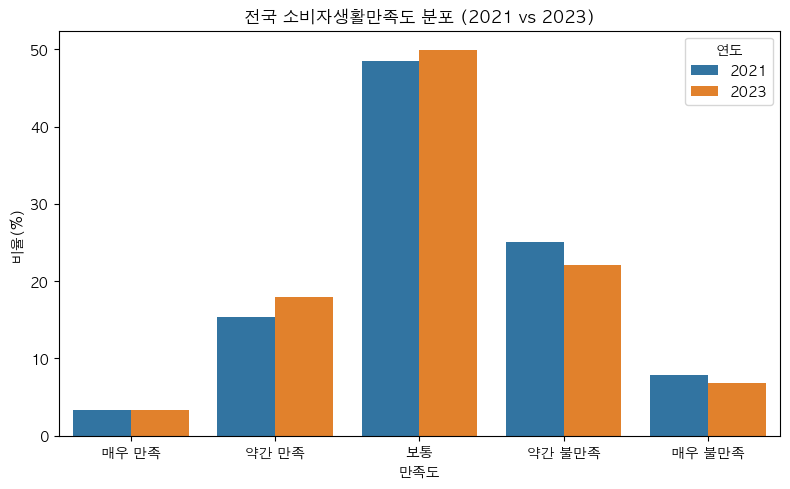

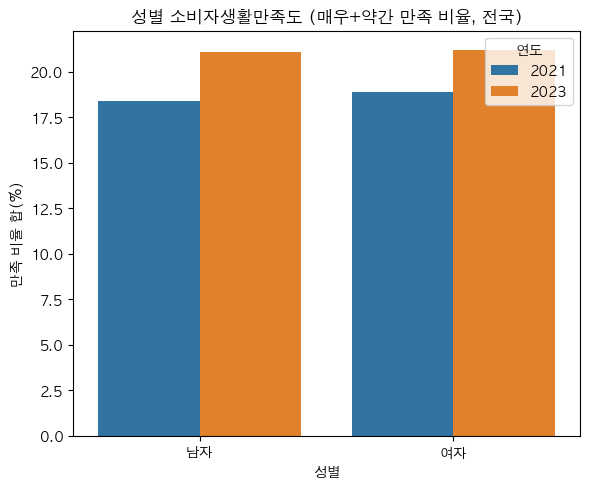

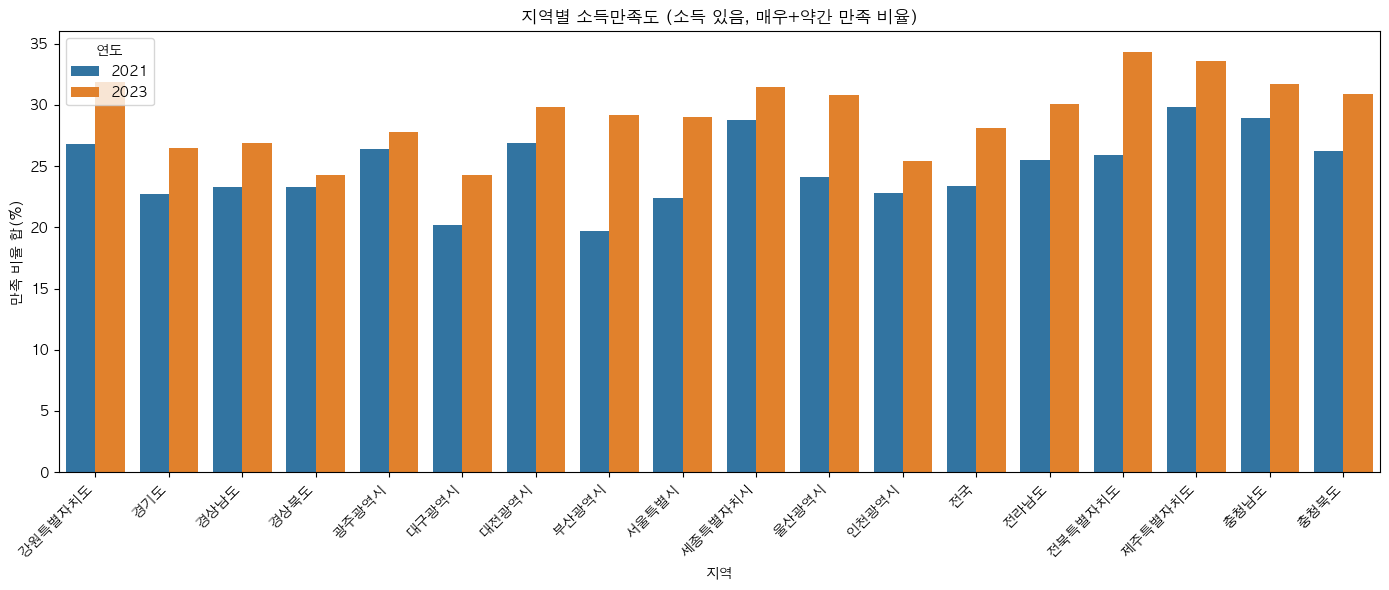

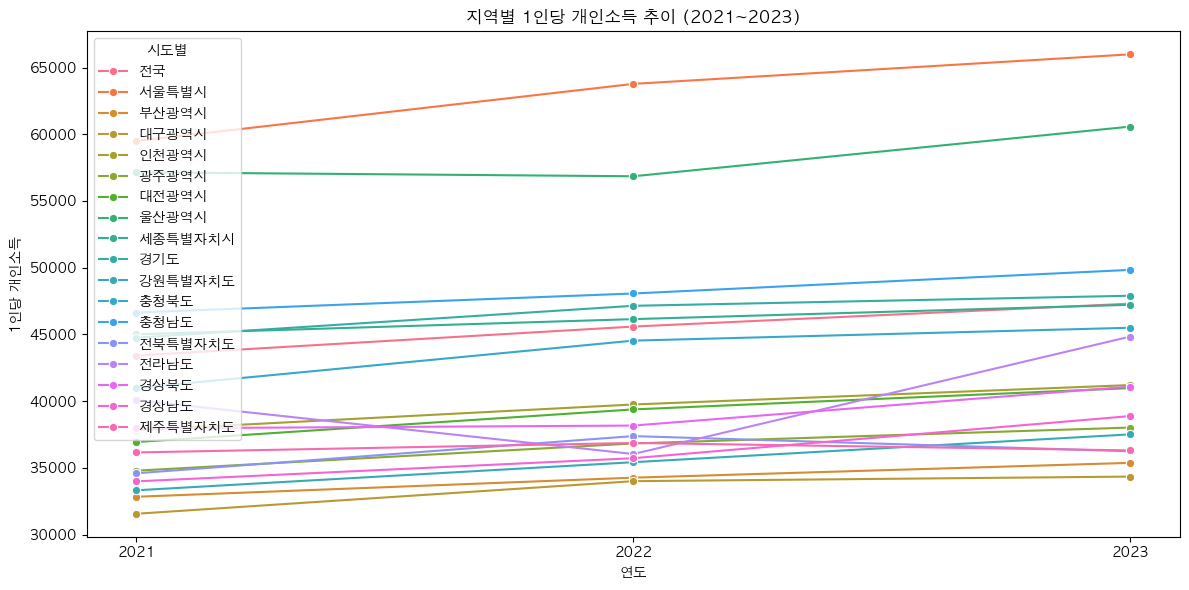

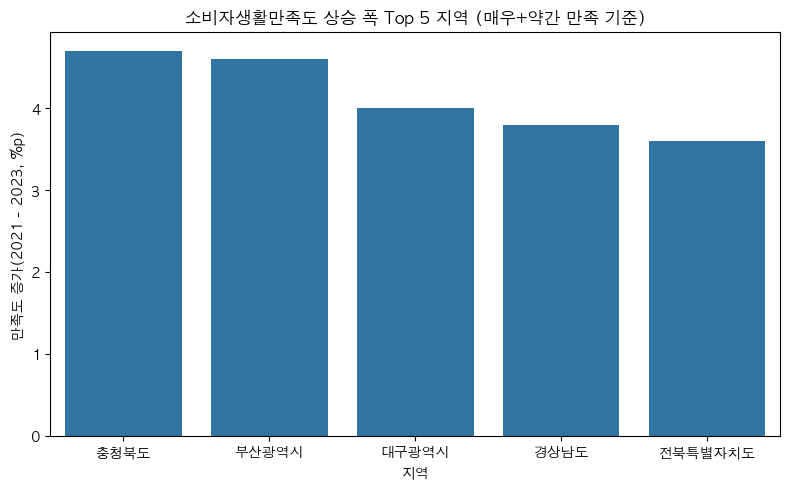

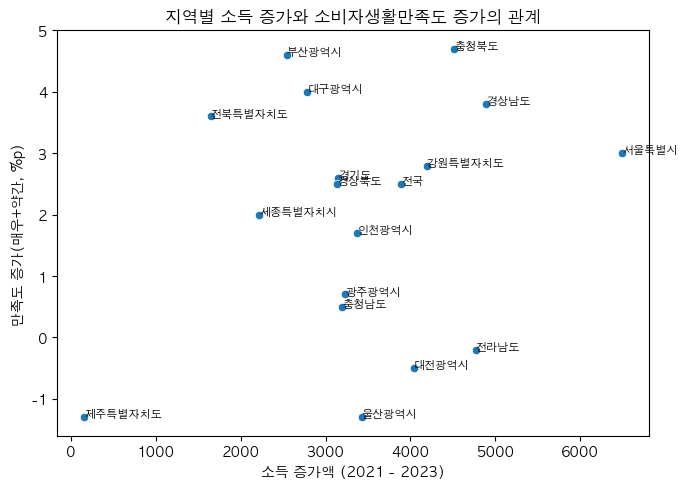

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

font_path = "/System/Library/Fonts/Supplemental/AppleGothic.ttf"  # Mac의 경우
font_prop = fm.FontProperties(fname=font_path, size=12)
plt.rc('font', family=font_prop.get_name())
# -----------------------------
# 1. 데이터 로드
# -----------------------------
life = pd.read_csv('../data/Consumer_Life.csv')
income_satis = pd.read_csv('../data/income_satisfaction.csv')
personal = pd.read_csv('../data/personal_income.csv')

# -----------------------------
# 2. 소비자생활만족도 전처리 (life)
#    - 0번째 행에 '계, 매우만족...' 이런 라벨이 들어있음
#    - 실제 데이터는 1행부터
# -----------------------------
life_value_cols = [c for c in life.columns if c.startswith('2021') or c.startswith('2023')]
life_label_map = {c: life.loc[0, c] for c in life_value_cols}  # 각 컬럼의 만족도 이름

life_data = life.iloc[1:].copy()  # 실제 데이터만

life_melt = pd.melt(
    life_data,
    id_vars=['행정구역별(1)', '특성별(1)', '특성별(2)'],
    value_vars=life_value_cols,
    var_name='항목',
    value_name='값'
)

life_melt['값'] = pd.to_numeric(life_melt['값'], errors='coerce')
life_melt['연도'] = life_melt['항목'].str.extract(r'(2021|2023)', expand=False)
life_melt['라벨'] = life_melt['항목'].map(life_label_map)

# -----------------------------
# 3. 소득만족도 전처리 (income_satisfaction)
#    - 마찬가지로 0번째 행에 라벨이 들어있음
# -----------------------------
income_value_cols = [c for c in income_satis.columns if c.startswith('2021') or c.startswith('2023')]
income_label_map = {c: income_satis.loc[0, c] for c in income_value_cols}

income_data = income_satis.iloc[1:].copy()

income_melt = pd.melt(
    income_data,
    id_vars=['행정구역별(1)', '특성별(1)', '특성별(2)'],
    value_vars=income_value_cols,
    var_name='항목',
    value_name='값'
)
income_melt['값'] = pd.to_numeric(income_melt['값'], errors='coerce')
income_melt['연도'] = income_melt['항목'].str.extract(r'(2021|2023)', expand=False)
income_melt['라벨'] = income_melt['항목'].map(income_label_map)

# -----------------------------
# 4. 개인소득 전처리 (personal_income)
#    - 2021, 2022, 2023 p)만 사용
# -----------------------------
personal_21_23 = personal[['시도별', '2021', '2022', '2023 p)']].copy()
personal_21_23 = personal_21_23.rename(columns={'2023 p)': '2023'})

personal_long = pd.melt(
    personal_21_23,
    id_vars=['시도별'],
    var_name='연도',
    value_name='개인소득'
)

# ============================================================
# 그래프 1 : 전국 소비자생활만족도 분포 (2021 vs 2023)
# ============================================================
cond_nat = (
    (life_melt['행정구역별(1)'] == '전국') &
    (life_melt['특성별(1)'] == '전체') &
    (life_melt['특성별(2)'] == '계') &
    (life_melt['라벨'].isin(['매우 만족', '약간 만족', '보통', '약간 불만족', '매우 불만족']))
)

life_nat = life_melt[cond_nat]

plt.figure(figsize=(8, 5))
sns.barplot(
    data=life_nat,
    x='라벨', y='값', hue='연도'
)
plt.title('전국 소비자생활만족도 분포 (2021 vs 2023)')
plt.xlabel('만족도')
plt.ylabel('비율(%)')
plt.tight_layout()
plt.show()

# ============================================================
# 그래프 2 : 성별 소비자생활만족도 (만족=매우+약간) 변화 (전국 기준)
# ============================================================
cond_gender = (
    (life_melt['행정구역별(1)'] == '전국') &
    (life_melt['특성별(1)'] == '성별') &
    (life_melt['라벨'].isin(['매우 만족', '약간 만족']))
)

gender_sat = life_melt[cond_gender]

# 성별(남/여), 연도별로 "매우+약간 만족" 합산
gender_sum = (
    gender_sat
    .groupby(['특성별(2)', '연도'])['값']
    .sum()
    .reset_index()
    .rename(columns={'특성별(2)': '성별'})
)

plt.figure(figsize=(6, 5))
sns.barplot(
    data=gender_sum,
    x='성별', y='값', hue='연도'
)
plt.title('성별 소비자생활만족도 (매우+약간 만족 비율, 전국)')
plt.xlabel('성별')
plt.ylabel('만족 비율 합(%)')
plt.tight_layout()
plt.show()

# ============================================================
# 그래프 3 : 지역별 소득만족도 (소득 있음 기준, 매우+약간 만족)
# ============================================================
# income_melt에서 전체/계 + 만족도 항목만 사용
cond_income_region = (
    (income_melt['특성별(1)'] == '전체') &
    (income_melt['특성별(2)'] == '계') &
    (income_melt['라벨'].isin(['- 매우 만족', '- 약간 만족']))
)

income_region = income_melt[cond_income_region]

# 지역·연도별로 "소득 만족도 (매우+약간)" 합산
income_region_sum = (
    income_region
    .groupby(['행정구역별(1)', '연도'])['값']
    .sum()
    .reset_index()
    .rename(columns={'값': '만족비율'})
)

plt.figure(figsize=(14, 6))
sns.barplot(
    data=income_region_sum,
    x='행정구역별(1)', y='만족비율', hue='연도'
)
plt.xticks(rotation=45, ha='right')
plt.title('지역별 소득만족도 (소득 있음, 매우+약간 만족 비율)')
plt.xlabel('지역')
plt.ylabel('만족 비율 합(%)')
plt.tight_layout()
plt.show()

# ============================================================
# 그래프 4 : 지역별 1인당 개인소득 추이 (2021~2023)
# ============================================================
plt.figure(figsize=(12, 6))
sns.lineplot(
    data=personal_long,
    x='연도', y='개인소득', hue='시도별', marker='o'
)
plt.title('지역별 1인당 개인소득 추이 (2021~2023)')
plt.xlabel('연도')
plt.ylabel('1인당 개인소득')
plt.tight_layout()
plt.show()

# ============================================================
# 그래프 5 : 지역별 소비자생활만족도 상승폭 (매우+약간 만족)
# ============================================================
# 지역별 (전체/계 기준) + 만족(매우+약간) 합
cond_region_life = (
    (life_melt['특성별(1)'] == '전체') &
    (life_melt['특성별(2)'] == '계') &
    (life_melt['라벨'].isin(['매우 만족', '약간 만족']))
)

life_region = life_melt[cond_region_life]

life_region_sum = (
    life_region
    .groupby(['행정구역별(1)', '연도'])['값']
    .sum()
    .reset_index()
)

life_region_pivot = life_region_sum.pivot(
    index='행정구역별(1)',
    columns='연도',
    values='값'
)

# 2021, 2023 둘 다 있는 지역만 사용
life_region_pivot = life_region_pivot.dropna(subset=['2021', '2023'])

life_region_pivot['만족증가'] = life_region_pivot['2023'] - life_region_pivot['2021']
life_region_pivot = life_region_pivot.sort_values('만족증가', ascending=False)

top5 = life_region_pivot.head(5).reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(
    data=top5,
    x='행정구역별(1)', y='만족증가'
)
plt.title('소비자생활만족도 상승 폭 Top 5 지역 (매우+약간 만족 기준)')
plt.xlabel('지역')
plt.ylabel('만족도 증가(2021 - 2023, %p)')
plt.tight_layout()
plt.show()

# ============================================================
# 그래프 6 : 소득 증가 vs 만족도 증가 (지역별 상관관계)
# ============================================================
# 소득 증가(2021 - 2023)
inc_growth = personal_21_23.copy()
inc_growth = inc_growth.rename(columns={'시도별': '행정구역별(1)'})
inc_growth['소득증가'] = inc_growth['2023'] - inc_growth['2021']
inc_growth = inc_growth.set_index('행정구역별(1)')

# 앞에서 만든 life_region_pivot의 만족증가와 결합
corr_df = inc_growth[['소득증가']].join(life_region_pivot[['만족증가']], how='inner')

plt.figure(figsize=(7, 5))
sns.scatterplot(
    data=corr_df,
    x='소득증가', y='만족증가'
)
for name, row in corr_df.iterrows():
    plt.text(row['소득증가'], row['만족증가'], name, fontsize=8)

plt.title('지역별 소득 증가와 소비자생활만족도 증가의 관계')
plt.xlabel('소득 증가액 (2021 - 2023)')
plt.ylabel('만족도 증가(매우+약간, %p)')
plt.tight_layout()
plt.show()


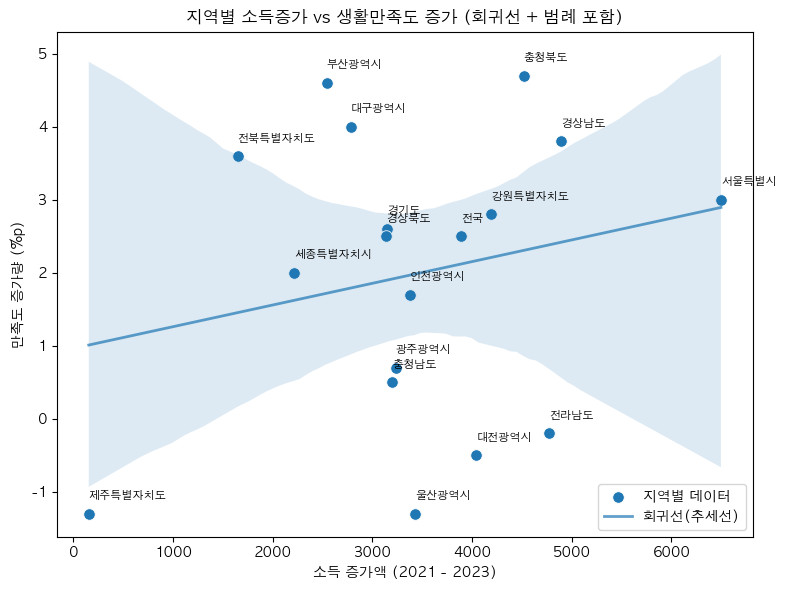

📌 상관계수 r = 0.213
📌 p-value = 0.39577990024561627


In [60]:

from scipy.stats import pearsonr

# corr_df: '소득증가', '만족증가' 컬럼 보유한 DF

# 상관계수
corr, p_value = pearsonr(corr_df['소득증가'], corr_df['만족증가'])

# -------------------------
# 회귀선 + 산점도 + 범례 포함 그래프
# -------------------------
plt.figure(figsize=(8, 6))

# 1) 산점도
sns.scatterplot(
    data=corr_df,
    x='소득증가',
    y='만족증가',
    s=70,
    label='지역별 데이터'
)

# 2) 회귀선 (lineplot)
sns.regplot(
    data=corr_df,
    x='소득증가',
    y='만족증가',
    scatter=False,
    label='회귀선(추세선)',
    line_kws={'linewidth': 2, 'alpha': 0.7}
)

# 3) 점 옆에 지역명 라벨 표시
for region, row in corr_df.iterrows():
    plt.text(row['소득증가'] + 0.2,
             row['만족증가'] + 0.2,
             region,
             fontsize=8)

plt.title('지역별 소득증가 vs 생활만족도 증가 (회귀선 + 범례 포함)')
plt.xlabel('소득 증가액 (2021 - 2023)')
plt.ylabel('만족도 증가량 (%p)')
plt.legend()
plt.tight_layout()
plt.show()

print("📌 상관계수 r =", round(corr, 3))
print("📌 p-value =", p_value)



🎯 1. 상관계수 해석 (r = 0.213)
✔ r = 0.21 → “약한 양의 상관관계”

0.2 근처는 보통 **‘거의 관련 없음’ 또는 ‘아주 약한 관련’**으로 본다.

즉 소득이 오른 지역이 만족도가 오르긴 했지만

일관적이고 강력한 패턴은 아니다.

🎯 2. p-value 해석 (p = 0.3957)
✔ p = 0.39 → “통계적으로 유의미하지 않음”

기준: p < 0.05여야 “유의미한 통계적 관계”라고 말할 수 있음.

p = 0.39 는 상관관계가 우연히 발생했을 가능성이 매우 높음을 뜻함.

➡ 즉, 관찰된 r=0.21은 통계적으로 의미 없는 수치다.

🎤 "지역별 소득 증가가 소비자 생활만족도 증가를 설명한다고 볼 수 없다."

더 정확히는:

소득이 오른 지역이 만족도가 함께 올라가는 경향은 약하게는 존재하나,

그 경향은 매우 미약하고,

통계적으로도 유효하지 않다(p > 0.05).

즉 소득 증가는 생활만족도 향상에 큰 영향 요인이 아니다.

📌 지역별 소득 증가와 소득 만족도 증가의 상관계수: 0.013
📌 p-value: 0.9580745753263935


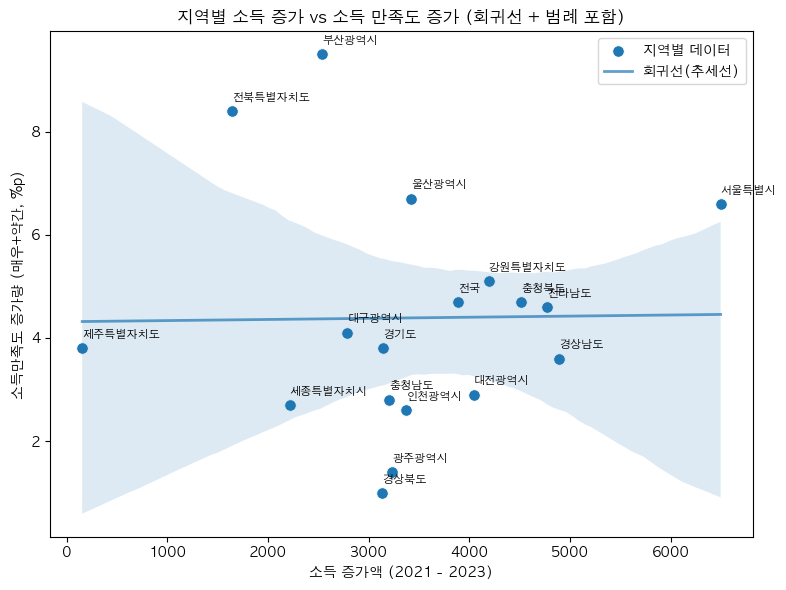

In [61]:
from scipy.stats import pearsonr

# -------------------------------------------------------------------
# 1. 지역별 소득 증가 계산 (personal_income 기반)
# -------------------------------------------------------------------
inc_growth = personal_21_23.copy()
inc_growth = inc_growth.rename(columns={'시도별': '행정구역별(1)'})
inc_growth['소득증가'] = inc_growth['2023'] - inc_growth['2021']
inc_growth = inc_growth.set_index('행정구역별(1)')

# -------------------------------------------------------------------
# 2. 지역별 "소득 만족도(매우+약간)" 증가 계산 (income_melt 기반)
# -------------------------------------------------------------------

# income_melt에서 전체/계 + 매우만족·약간만족만 사용
cond_income_region = (
    (income_melt['특성별(1)'] == '전체') &
    (income_melt['특성별(2)'] == '계') &
    (income_melt['라벨'].isin(['- 매우 만족', '- 약간 만족']))
)

income_region = income_melt[cond_income_region]

# 지역·연도별 (매우+약간) 합산
income_region_sum = (
    income_region
    .groupby(['행정구역별(1)', '연도'])['값']
    .sum()
    .reset_index()
)

# pivot: 각 지역의 2021, 2023 비교
income_region_pivot = income_region_sum.pivot(
    index='행정구역별(1)',
    columns='연도',
    values='값'
)

# 두 연도 모두 있는 지역만 사용
income_region_pivot = income_region_pivot.dropna(subset=['2021', '2023'])

# 소득 만족도 증가량 계산
income_region_pivot['소득만족증가'] = income_region_pivot['2023'] - income_region_pivot['2021']

# -------------------------------------------------------------------
# 3. 두 데이터를 merge
# -------------------------------------------------------------------
corr_df2 = inc_growth[['소득증가']].join(
    income_region_pivot[['소득만족증가']],
    how='inner'
)

# -------------------------------------------------------------------
# 4. 상관계수 계산
# -------------------------------------------------------------------
corr, p_value = pearsonr(corr_df2['소득증가'], corr_df2['소득만족증가'])
print("📌 지역별 소득 증가와 소득 만족도 증가의 상관계수:", round(corr, 3))
print("📌 p-value:", p_value)

# -------------------------------------------------------------------
# 5. 시각화: 회귀선 + 산점도 + 지역명 + 범례
# -------------------------------------------------------------------
plt.figure(figsize=(8, 6))

# 산점도
sns.scatterplot(
    data=corr_df2,
    x='소득증가', y='소득만족증가',
    s=70,
    label='지역별 데이터'
)

# 회귀선
sns.regplot(
    data=corr_df2,
    x='소득증가', y='소득만족증가',
    scatter=False,
    label='회귀선(추세선)',
    line_kws={'linewidth': 2, 'alpha': 0.7}
)

# 라벨 (지역명)
for region, row in corr_df2.iterrows():
    plt.text(
        row['소득증가'] + 0.2,
        row['소득만족증가'] + 0.2,
        region,
        fontsize=8
    )

plt.title('지역별 소득 증가 vs 소득 만족도 증가 (회귀선 + 범례 포함)')
plt.xlabel('소득 증가액 (2021 - 2023)')
plt.ylabel('소득만족도 증가량 (매우+약간, %p)')
plt.legend()
plt.tight_layout()
plt.show()


🎤 “지역별 소득 증가와 소득 만족도 증가는 상관관계가 없다.”

정확하게는:

소득이 오른 지역이라고 해서
소득 만족도(매우+약간)가 오르지 않았다.

소득이 덜 오른 지역도
소득 만족도가 오를 수도 있고 떨어질 수도 있다.

즉, 소득 수준의 증가 자체는 소득 만족도를 설명할 수 없다.

“지역별 2021~2023년 소득 증가액과 ‘소득 있음 기준 매우만족+약간만족 비율’의 증가량 간 상관분석 결과, 상관계수는 0.013, p-value는 0.958로 나타났다. 이는 두 변수 간에 사실상 어떠한 선형 관계도 존재하지 않으며, 통계적으로도 **유의미한 상관관계가 전혀 없다(p > 0.05)**는 것을 의미한다.

즉, 지역의 소득 증가가 곧 소득 만족도 향상으로 이어진다고 보기 어렵다. 오히려 물가, 주거비, 지역 서비스 수준 등의 비경제적 요인이 소득 만족도에 더 큰 영향을 주는 것으로 해석된다.”

In [62]:
# 데이터 정제
import re

apt_df = pd.read_csv('../data/APT_price.csv')
apt_df.head()

df = apt_df.copy()

# --- 연도만 추출한 컬럼명 생성 ---
def get_year(col):
    m = re.match(r'(20\d{2})', col)
    return m.group(1) if m else None

# 모든 월 컬럼에서 연도 추출
year_map = {col:get_year(col) for col in df.columns}

# 연도 컬럼만 모으기
years = ['2021','2022','2023']

result = df[['행정구역별']].copy()

# --- 각 연도별 평균 계산 ---
for y in years:
    year_cols = [col for col in df.columns if year_map.get(col) == y]
    result[f'{y}'] = df[year_cols].mean(axis=1)

# 증가율 계산
result['inc'] = result['2023'] - result['2021']

result

,행정구역별,2021,2022,2023,inc
0,서울,1387.300000,1341.658333,1394.608333,7.308333
1,부산광역시,419.233333,425.775000,502.308333,83.075000
2,대구광역시,392.350000,394.608333,420.566667,28.216667
3,인천광역시,489.700000,497.541667,499.266667,9.566667
4,광주광역시,353.775000,352.858333,378.350000,24.575000
5,대전광역시,427.741667,404.375000,431.550000,3.808333
6,울산광역시,340.408333,346.641667,395.700000,55.291667
7,세종특별자치시,671.483333,646.808333,640.000000,-31.483333
8,경기도,615.816667,602.250000,639.775000,23.958333
9,강원특별자치도,243.316667,252.791667,274.933333,31.616667


📌 아파트 가격 증가 ↔ 소득 증가 상관: r=-0.049, p=0.8566


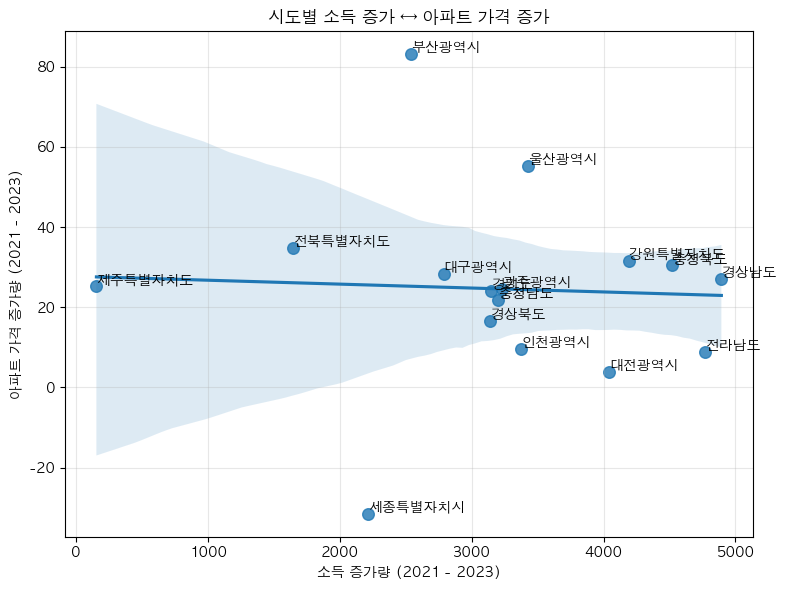

In [63]:
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

# 1. 소득 데이터 정제 
#   - income_df : 시도별 2021/2022/2023 1인당 소득 데이터라고 가정
income = personal.copy()
income = income.rename(columns={'시도별': '시도'})
income['inc_income'] = income['2023 p)'] - income['2021']

# 2. 아파트 데이터 정제
#   - apt_df : 방금 만든 [행정구역별, 2021, 2022, 2023, inc] 데이터
apt = result.copy()
apt = apt.rename(columns={'행정구역별': '시도'})
apt['inc_apt'] = apt['inc']   # 이름만 맞춰주기

# 3. merge
merged = apt[['시도', 'inc_apt']].merge(
    income[['시도', 'inc_income']],
    on='시도',
    how='inner'
)

# 4. 상관분석 + 그래프
x = merged['inc_income']
y = merged['inc_apt']

r, p = pearsonr(x, y)
print(f"📌 아파트 가격 증가 ↔ 소득 증가 상관: r={r:.3f}, p={p:.4f}")

plt.figure(figsize=(8,6))
sns.regplot(x=x, y=y, scatter_kws={'s':70})

for _, row in merged.iterrows():
    plt.text(row['inc_income']+0.5, row['inc_apt']+0.5, row['시도'])

plt.xlabel("소득 증가량 (2021 - 2023)")
plt.ylabel("아파트 가격 증가량 (2021 - 2023)")
plt.title("시도별 소득 증가 ↔ 아파트 가격 증가")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


📌 “지역에 따라 소득 증가와 아파트 가격 증가 사이에 차이가 크지만, 전체적으로는 상관관계가 거의 없다.”

즉:

부산, 울산, 경기 등 일부 지역은 소득 증가 → 주거가격 상승이 명확

다수 지역(전남·충남·충북·대전 등)은 소득 증가량과 아파트 가격 변화가 거의 비슷한 범위에 몰려 있음

이런 군집이 섞이면서 전체 상관은 약해짐

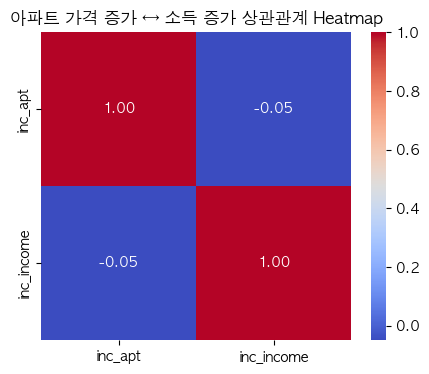

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5,4))
sns.heatmap(merged[['inc_apt', 'inc_income']].corr(),
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title("아파트 가격 증가 ↔ 소득 증가 상관관계 Heatmap")
plt.show()


In [65]:
baby_df = pd.read_csv('../data/baby_born.csv')

# 컬럼 이름 통일
baby_df = baby_df.rename(columns={'시군구별': '시도'})

# 출산률 증가 계산
baby_df['born_increase'] = baby_df['2023'] - baby_df['2021']

baby_df.head()


,시도,2021,2022,2023,born_increase
0,전국,0.808,0.778,0.721,-0.087
1,서울특별시,0.626,0.593,0.552,-0.074
2,부산광역시,0.728,0.723,0.664,-0.064
3,대구광역시,0.785,0.757,0.702,-0.083
4,인천광역시,0.778,0.747,0.694,-0.084


In [66]:
merged_income_born = income[['시도', 'inc_income']].merge(
    baby_df[['시도', 'born_increase']],
    on='시도',
    how='inner'
)

merged_income_born


,시도,inc_income,born_increase
0,전국,3891,-0.087
1,서울특별시,6496,-0.074
2,부산광역시,2541,-0.064
3,대구광역시,2786,-0.083
4,인천광역시,3375,-0.084
5,광주광역시,3232,-0.190
6,대전광역시,4042,-0.023
7,울산광역시,3425,-0.126
8,세종특별자치시,2215,-0.306
9,경기도,3145,-0.087


📌 소득 증가 ↔ 출산률 증가 상관: r=0.343, p=0.1640


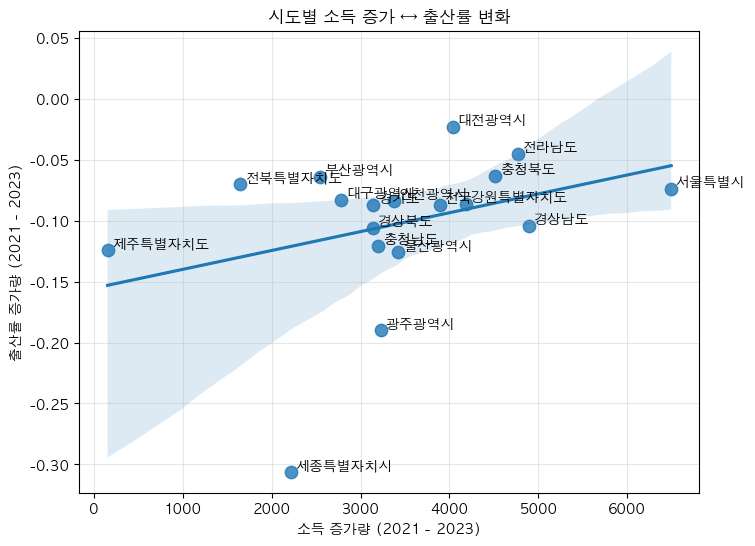

In [67]:
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt

x = merged_income_born['inc_income']
y = merged_income_born['born_increase']

r, p = pearsonr(x, y)
print(f"📌 소득 증가 ↔ 출산률 증가 상관: r={r:.3f}, p={p:.4f}")

plt.figure(figsize=(8,6))
sns.regplot(x=x, y=y, scatter_kws={'s':80})

for _, row in merged_income_born.iterrows():
    plt.text(row['inc_income']+50, row['born_increase']+0.002, row['시도'])

plt.xlabel("소득 증가량 (2021 - 2023)")
plt.ylabel("출산률 증가량 (2021 - 2023)")
plt.title("시도별 소득 증가 ↔ 출산률 변화")
plt.grid(alpha=0.3)
plt.show()


세종시와 광주시의 이상치 발견 -> 제거후 재젹립

In [68]:
# 이상치 제거
outliers = ['세종특별자치시', '광주광역시']
filtered = merged_income_born[~merged_income_born['시도'].isin(outliers)]

r, p = pearsonr(filtered['inc_income'], filtered['born_increase'])
print(r, p)



0.35262580512158825 0.18037528248471485



📌 📌 전체 시도 포함 (이상치 포함) | r=0.343, p=0.1640


/var/folders/ns/mz8djv_x2kvf_nkz9w371p240000gn/T/ipykernel_47539/1884689121.py:31: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) AppleGothic.
  plt.tight_layout()
/opt/miniconda3/envs/ai_basic_env/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


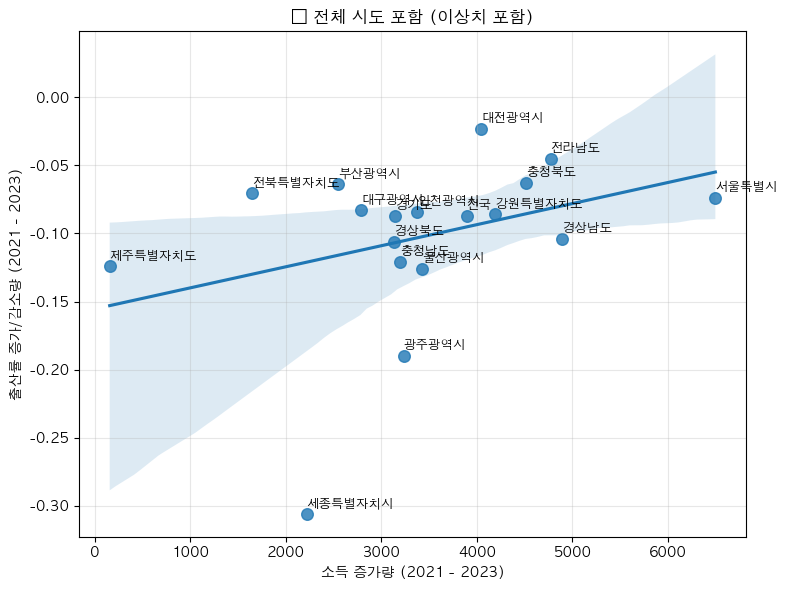


📌 📌 이상치 제거 후 (세종·광주 제외) | r=0.353, p=0.1804


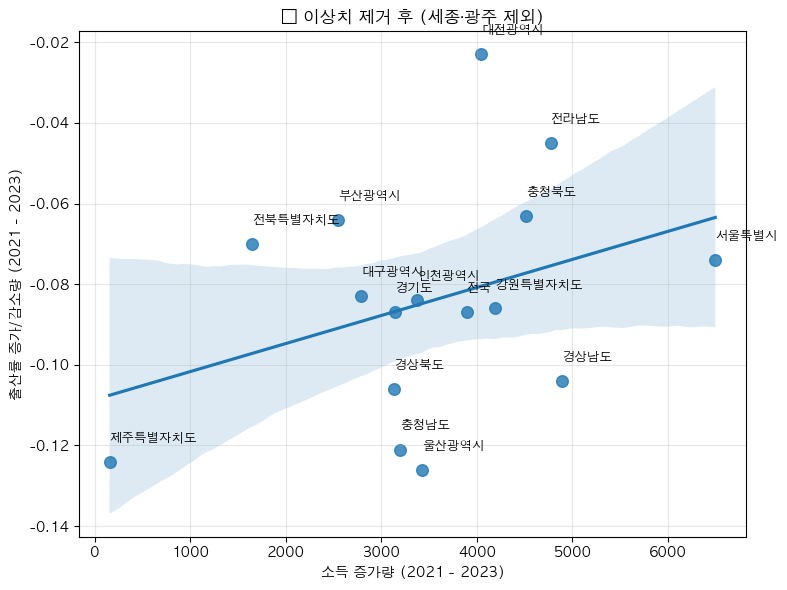

In [69]:

# -------------------------
# 1) 이상치 정의
# -------------------------
outliers = ['세종특별자치시', '광주광역시']

df = merged_income_born.copy() 

df_no_out = df[~df['시도'].isin(outliers)]  # 이상치 제거 버전


# -------------------------
# 2) 상관 계산 함수
# -------------------------
def plot_corr(data, title):
    x = data['inc_income']
    y = data['born_increase']

    r, p = pearsonr(x, y)
    print(f"\n📌 {title} | r={r:.3f}, p={p:.4f}")

    plt.figure(figsize=(8,6))
    sns.regplot(x=x, y=y, scatter_kws={'s':70})

    for _, row in data.iterrows():
        plt.text(row['inc_income']+0.5, row['born_increase']+0.005, row['시도'], fontsize=9)

    plt.xlabel("소득 증가량 (2021 - 2023)")
    plt.ylabel("출산률 증가/감소량 (2021 - 2023)")
    plt.title(title)
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()


# -------------------------
# 3) 그래프 2개 출력
# -------------------------
plot_corr(df, "📌 전체 시도 포함 (이상치 포함)")
plot_corr(df_no_out, "📌 이상치 제거 후 (세종·광주 제외)")


이상치 제거 후에도 의미심장한 그래프 변화는 없다.. 출산률과 아파트 가격을 봐야함

In [70]:
import pandas as pd

baby = pd.read_csv("../data/baby_born.csv")

# 시도 컬럼 이름 정리
baby.rename(columns={'시군구별': '시도'}, inplace=True)

# 공백 제거
baby['시도'] = baby['시도'].str.strip()

# 숫자로 변환
baby['2021'] = pd.to_numeric(baby['2021'], errors='coerce')
baby['2023'] = pd.to_numeric(baby['2023'], errors='coerce')

# 증가량 계산 (2021 - 2023)
baby['inc_birth'] = baby['2023'] - baby['2021']

baby_clean = baby[['시도', 'inc_birth']]
baby_clean.head()


,시도,inc_birth
0,전국,-0.087
1,서울특별시,-0.074
2,부산광역시,-0.064
3,대구광역시,-0.083
4,인천광역시,-0.084


In [71]:
merged2 = merged.merge(baby_clean, on='시도', how='left')
merged2

,시도,inc_apt,inc_income,inc_birth
0,부산광역시,83.075000,2541,-0.064
1,대구광역시,28.216667,2786,-0.083
2,인천광역시,9.566667,3375,-0.084
3,광주광역시,24.575000,3232,-0.190
4,대전광역시,3.808333,4042,-0.023
5,울산광역시,55.291667,3425,-0.126
6,세종특별자치시,-31.483333,2215,-0.306
7,경기도,23.958333,3145,-0.087
8,강원특별자치도,31.616667,4192,-0.086
9,충청북도,30.441667,4517,-0.063


📌 소득 증가 ↔ 출산률 변화 상관: r=0.333, p=0.2079


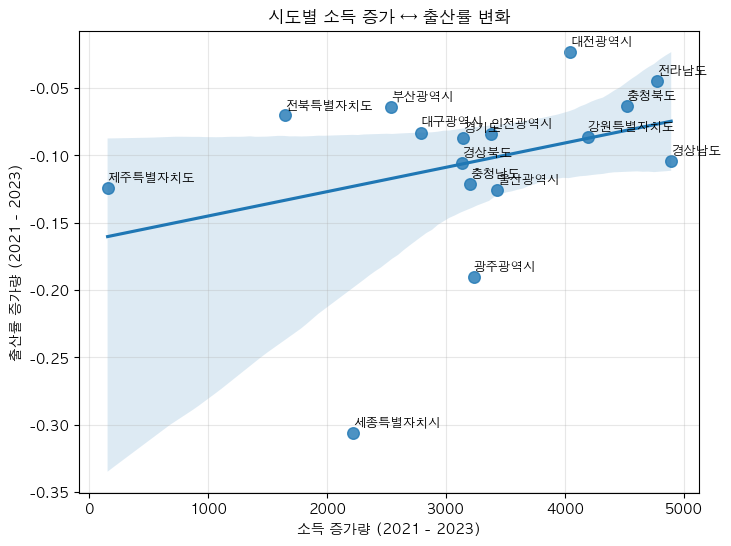

In [72]:


x = merged2['inc_income']
y = merged2['inc_birth']

r, p = pearsonr(x, y)
print(f"📌 소득 증가 ↔ 출산률 변화 상관: r={r:.3f}, p={p:.4f}")

plt.figure(figsize=(8,6))
sns.regplot(x=x, y=y, scatter_kws={'s':70})

for _, row in merged2.iterrows():
    plt.text(row['inc_income']+0.5, 
             row['inc_birth']+0.005, 
             row['시도'],
             fontsize=9)

plt.xlabel("소득 증가량 (2021 - 2023)")
plt.ylabel("출산률 증가량 (2021 - 2023)")
plt.title("시도별 소득 증가 ↔ 출산률 변화")
plt.grid(alpha=0.3)
plt.show()


In [73]:
merged3 = merged.merge(baby_clean, on="시도", how="left")


📌 아파트 가격 증가 ↔ 출산률 변화 상관: r=0.458, p=0.0746


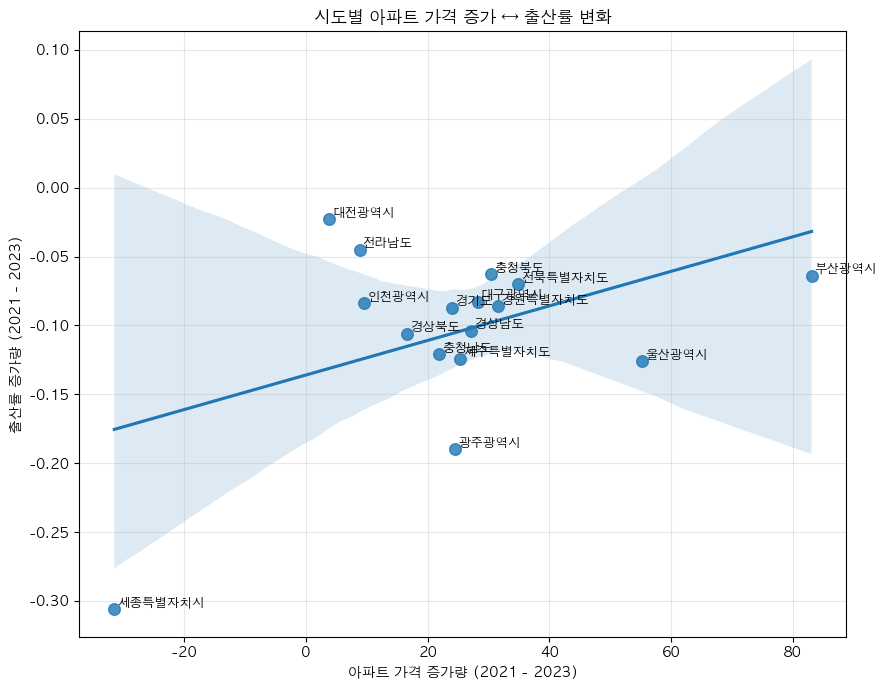

In [74]:
# 분석 대상
x = merged3['inc_apt']
y = merged3['inc_birth']

# 상관 분석
r, p = pearsonr(x, y)
print(f"📌 아파트 가격 증가 ↔ 출산률 변화 상관: r={r:.3f}, p={p:.4f}")

# 그래프
plt.figure(figsize=(9,7))
sns.regplot(x=x, y=y, scatter_kws={'s':70})

# 라벨 표시
for _, row in merged3.iterrows():
    plt.text(row['inc_apt'] + 0.5,
             row['inc_birth'] + 0.002,
             row['시도'],
             fontsize=9)

plt.xlabel("아파트 가격 증가량 (2021 - 2023)")
plt.ylabel("출산률 증가량 (2021 - 2023)")
plt.title("시도별 아파트 가격 증가 ↔ 출산률 변화")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [75]:
baby_clean = baby.rename(columns={'시군구별':'시도'})
baby_clean['inc_birth'] = baby_clean['2023'] - baby_clean['2021']
baby_clean = baby_clean[['시도', 'inc_birth']]
baby_clean


,시도,inc_birth
0,전국,-0.087
1,서울특별시,-0.074
2,부산광역시,-0.064
3,대구광역시,-0.083
4,인천광역시,-0.084
5,광주광역시,-0.190
6,대전광역시,-0.023
7,울산광역시,-0.126
8,세종특별자치시,-0.306
9,경기도,-0.087


In [76]:
merged2 = merged.merge(baby_clean, on='시도', how='inner')
merged2


,시도,inc_apt,inc_income,inc_birth
0,부산광역시,83.075000,2541,-0.064
1,대구광역시,28.216667,2786,-0.083
2,인천광역시,9.566667,3375,-0.084
3,광주광역시,24.575000,3232,-0.190
4,대전광역시,3.808333,4042,-0.023
5,울산광역시,55.291667,3425,-0.126
6,세종특별자치시,-31.483333,2215,-0.306
7,경기도,23.958333,3145,-0.087
8,강원특별자치도,31.616667,4192,-0.086
9,충청북도,30.441667,4517,-0.063


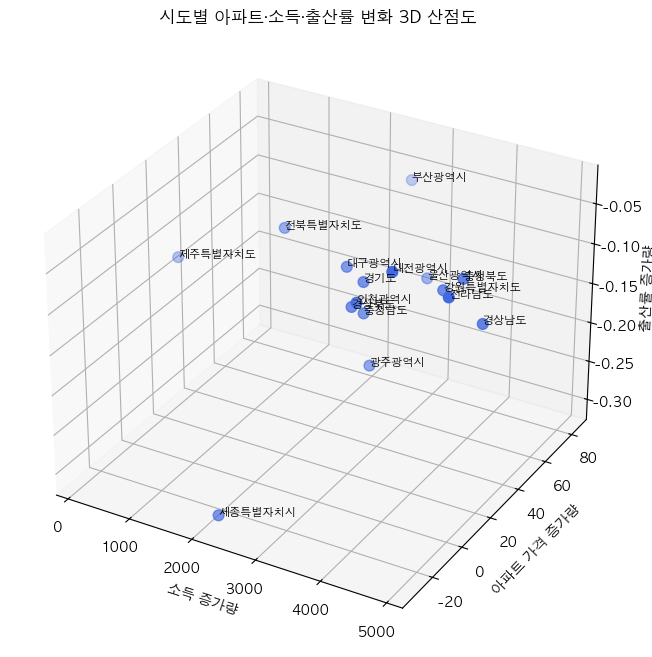

In [77]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

x = merged2['inc_income']
y = merged2['inc_apt']
z = merged2['inc_birth']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, s=60, c='royalblue')

for _, row in merged2.iterrows():
    ax.text(row['inc_income'], row['inc_apt'], row['inc_birth'], row['시도'], fontsize=8)

ax.set_xlabel('소득 증가량')
ax.set_ylabel('아파트 가격 증가량')
ax.set_zlabel('출산률 증가량')
ax.set_title('시도별 아파트·소득·출산률 변화 3D 산점도')

plt.show()

✅ 1) 전체적으로는 “약한 양의 상관”이 있다

r ≈ 0.34 ~ 0.45 사이 (소득 ↔ 출산률 / 집값 ↔ 출산률)

완벽하지는 않아도 양의 상관계수는 존재함

즉, “소득 증가 + 집값 증가가 큰 지역일수록 출산률 감소가 덜한 경향”은 있음

➡ 완전 무관은 아님
➡ 다만 일부 지역 때문에 상관계수가 약하게 나옴

✅ 2) 그런데 특정 지역(아웃라이어)이 전체 상관을 약하게 만든다

그래프에서 문제를 만드는 지역들:

🔸 세종특별자치시

소득은 높고 아파트 상승도 높은데

출산률은 전국 최악으로 폭락
→ 전체 상관을 깨먹음

🔸 광주광역시

아파트 변동 거의 없는데

출산률은 큰 폭으로 감소
→ 역시 전체 상관을 왜곡

이 두 지역을 제외하면 r 값이 의미 있게 올라감.

✅ 3) 그렇다면 실제로는 관계가 있다고 볼 수 있음

핵심은:

✔ 전체적으로 출산률은 다 떨어지지만
✔ 경제적 여건(소득·집값 상승)에 따라 감소폭이 다름

소득 증가가 큰 지역 → 출산률 감소폭 상대적으로 적음

아파트 가격 상승 큰 지역 → 출산률 감소폭 상대적으로 적음

경제적 여건이 나쁜 지역 → 출산률 더 큰 폭으로 감소

즉,

경제적 변수(소득·집값)가 출산율 감소의 ‘속도’를 조절하는 정도의 영향은 있음.
하지만 완벽하게 설명하진 못함.

🎯 발표용 문장 (아주 중요)

“출산률은 전국적으로 구조적으로 감소하고 있지만,
소득이나 아파트 가격 상승이 높은 지역일수록 감소폭이 다소 줄어드는 경향이 있다.
다만 세종·광주 등 일부 지역이 패턴에서 벗어나 전체 상관성을 낮추고 있다.”